<a href="https://colab.research.google.com/github/Rishi-2308/23RH1A0523day5/blob/main/diagnosisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [22]:
dataset_path =  '/content/drive/MyDrive/archive (2)/Pneumonia_CXRimages_sample_dataset/Pneumonia_CXRimages_sample_dataset/images'


import os
print(f"Dataset path type: {type(dataset_path)}")
print(f"Dataset path: {dataset_path}")



Dataset path type: <class 'str'>
Dataset path: /content/drive/MyDrive/archive(2)/Pneumonia_CXRimages_sample_dataset/Pneumonia_CXRimages_sample_dataset/images


In [23]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [25]:
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (2)/Pneumonia_CXRimages_sample_dataset/Pneunmonia_CXRimages_sample_dataset/images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',   # change to 'binary' if you only have 2 classes
    subset='training',
    shuffle=True
)

Found 64 images belonging to 4 classes.


In [27]:
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (2)/Pneumonia_CXRimages_sample_dataset/Pneunmonia_CXRimages_sample_dataset/images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 16 images belonging to 4 classes.


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # softmax for multi-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 13s/step - accuracy: 0.2500 - loss: 3.6388 - val_accuracy: 0.2500 - val_loss: 5.3433
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.2292 - loss: 5.1689 - val_accuracy: 0.2500 - val_loss: 1.6137
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3542 - loss: 1.6304 - val_accuracy: 0.2500 - val_loss: 1.3854
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3021 - loss: 1.3770 - val_accuracy: 0.2500 - val_loss: 1.3549
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4271 - loss: 1.3091 - val_accuracy: 0.3125 - val_loss: 1.3220
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5208 - loss: 1.2323 - val_accuracy: 0.4375 - val_loss: 1.2956
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5104 - loss: 1.1164 - val_accuracy: 0.3750 - val_loss: 1.2306
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7188 - loss: 0.9922 - val_accuracy: 0.5000 - val_loss: 1.1787
Epoch 9/10
2/2

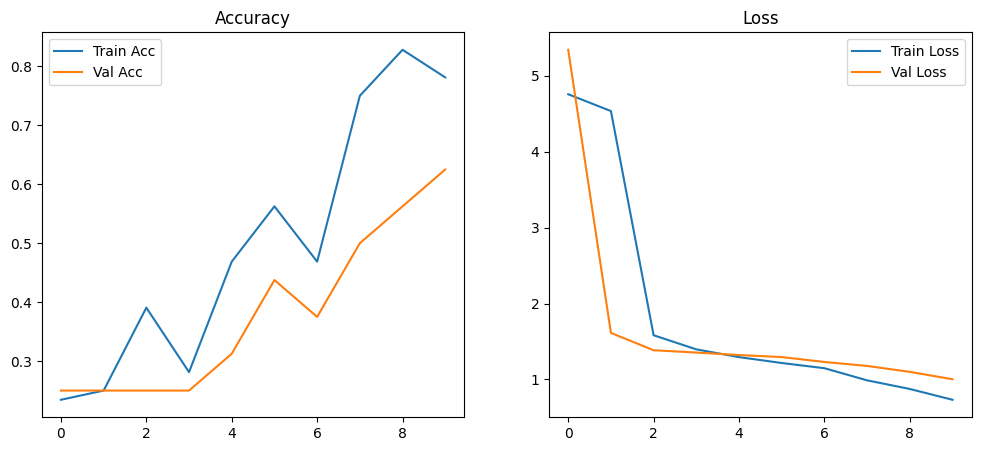

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [31]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Validation Loss: {val_loss:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.6250 - loss: 1.0034
Validation Accuracy: 0.62
Validation Loss: 1.00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


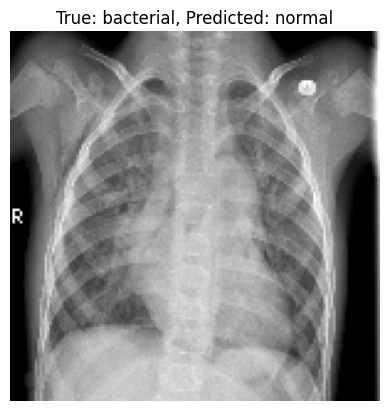

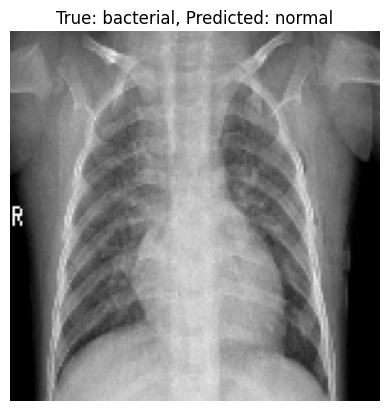

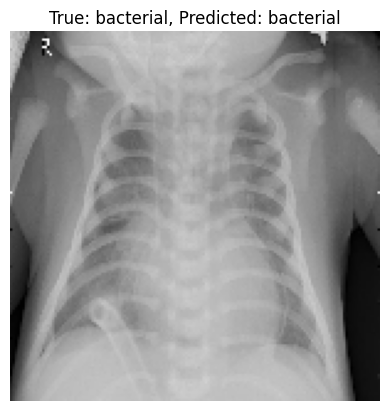

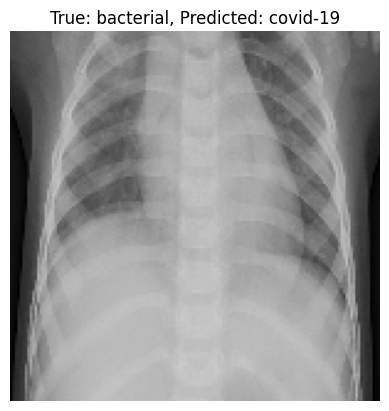

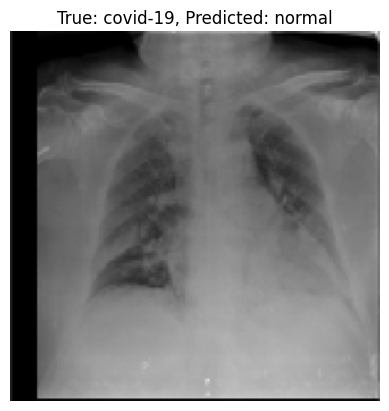

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of validation images and labels
images, labels = next(validation_generator)

# Predict on this batch
predictions = model.predict(images)

# Get class indices and names
class_names = list(validation_generator.class_indices.keys())

# Show first 5 predictions
for i in range(5):
    plt.imshow(images[i])
    plt.axis('off')
    true_label = class_names[np.argmax(labels[i])]
    predicted_label = class_names[np.argmax(predictions[i])]
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.show()


In [33]:
model.save('/content/drive/MyDrive/pneumonia_cnn_model.h5')
print("Model saved to Google Drive.")

Model saved to Google Drive.


In [34]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/pneumonia_cnn_model.h5')


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict entire validation set
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = validation_generator.classes

# Class labels
class_labels = list(validation_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

# Show confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step
              precision    recall  f1-score   support

   bacterial       0.50      0.25      0.33         4
    covid-19       0.75      0.75      0.75         4
      normal       0.50      1.00      0.67         4
       viral       1.00      0.50      0.67         4

    accuracy                           0.62        16
   macro avg       0.69      0.62      0.60        16
weighted avg       0.69      0.62      0.60        16

Confusion Matrix:
[[1 1 2 0]
 [0 3 1 0]
 [0 0 4 0]
 [1 0 1 2]]
